# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the MLP2024_25_CW1_Spec.pdf (see Learn,  Assignment Submission, Coursework 1). The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

def train_model(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    return stats, keys, run_time

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
# sys.path.append('/path/to/mlpractical')
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '..\\data\\emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '..\\data\\emnist-valid.npz' with keys: inputs, targets)


In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

# Create model with ONE hidden layer
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [ ]:
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: 0.8s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.55e-01
Epoch 2: 0.8s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01
Epoch 3: 0.7s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01
Epoch 4: 0.7s to complete
    error(train)=9.74e-01, acc(train)=7.21e-01, error(valid)=9.98e-01, acc(valid)=7.16e-01
Epoch 5: 0.7s to complete
    error(train)=9.34e-01, acc(train)=7.32e-01, error(valid)=9.63e-01, acc(valid)=7.27e-01
Epoch 6: 0.7s to complete
    error(train)=9.02e-01, acc(train)=7.39e-01, error(valid)=9.31e-01, acc(valid)=7.33e-01
Epoch 7: 0.7s to complete
    error(train)=8.63e-01, acc(train)=7.49e-01, error(valid)=8.99e-01, acc(valid)=7.41e-01
Epoch 8: 0.7s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01
Epoch 9: 0.7s to complete
    error(train)=8.24e-01, acc(train)=

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: 1.0s to complete
    error(train)=1.06e+00, acc(train)=7.02e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01
Epoch 2: 1.0s to complete
    error(train)=8.93e-01, acc(train)=7.40e-01, error(valid)=9.19e-01, acc(valid)=7.27e-01
Epoch 3: 1.1s to complete
    error(train)=7.89e-01, acc(train)=7.68e-01, error(valid)=8.22e-01, acc(valid)=7.62e-01
Epoch 4: 1.0s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.76e-01, acc(valid)=7.70e-01
Epoch 5: 0.9s to complete
    error(train)=6.87e-01, acc(train)=7.92e-01, error(valid)=7.34e-01, acc(valid)=7.77e-01
Epoch 6: 0.9s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01
Epoch 7: 0.9s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01
Epoch 8: 0.9s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.78e-01, acc(valid)=7.94e-01
Epoch 9: 0.9s to complete
    error(train)=5.88e-01, acc(train)=

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: 2.4s to complete
    error(train)=9.06e-01, acc(train)=7.37e-01, error(valid)=9.22e-01, acc(valid)=7.31e-01
Epoch 2: 2.4s to complete
    error(train)=7.00e-01, acc(train)=7.90e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01
Epoch 3: 2.3s to complete
    error(train)=6.05e-01, acc(train)=8.11e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01
Epoch 4: 2.7s to complete
    error(train)=5.54e-01, acc(train)=8.24e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01
Epoch 5: 2.4s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01
Epoch 6: 2.5s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01
Epoch 7: 2.4s to complete
    error(train)=4.64e-01, acc(train)=8.47e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01
Epoch 8: 2.2s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.51e-01, acc(valid)=8.19e-01
Epoch 9: 2.2s to complete
    error(train)=4.15e-01, acc(train)=

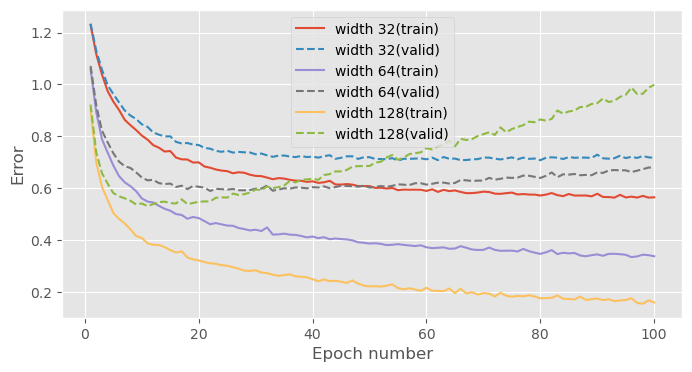

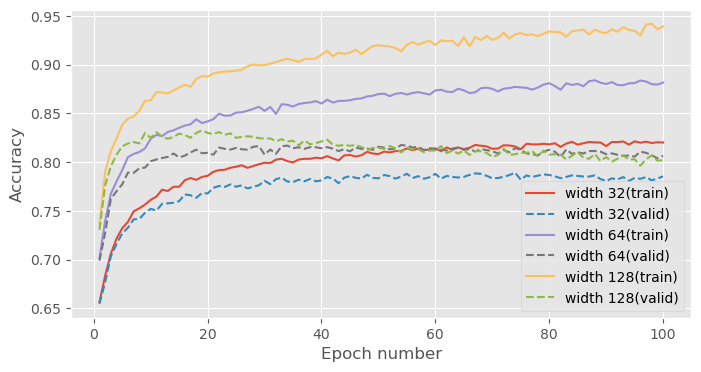

In [3]:
### task1 width
%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

todo=[32, 64, 128]
fig_error = plt.figure(figsize=(8, 4))
ax_error = fig_error.add_subplot(111)

fig_acc = plt.figure(figsize=(8, 4))
ax_acc = fig_acc.add_subplot(111)

for nn in todo:
    model = MultipleLayerModel([
        AffineLayer(input_dim, nn, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(nn, output_dim, weights_init, biases_init) # output layer
    ])

    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time= train_model(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    ax_error.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['error(train)']], label=f'width {nn}(train)')
    ax_error.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['error(valid)']], linestyle='--', label=f'width {nn}(valid)')
        
    ax_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['acc(train)']], label=f'width {nn}(train)')
    ax_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['acc(valid)']], linestyle='--', label=f'width {nn}(valid)')\

ax_error.legend(loc=0)
ax_error.set_xlabel('Epoch number')
ax_error.set_ylabel('Error')

ax_acc.legend(loc=0)
ax_acc.set_xlabel('Epoch number')
ax_acc.set_ylabel('Accuracy')

#fig_error.show()
#fig_acc.show()

plt.show()
    


Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: 2.2s to complete
    error(train)=9.05e-01, acc(train)=7.38e-01, error(valid)=9.19e-01, acc(valid)=7.33e-01
Epoch 2: 1.7s to complete
    error(train)=7.19e-01, acc(train)=7.83e-01, error(valid)=7.46e-01, acc(valid)=7.75e-01
Epoch 3: 1.7s to complete
    error(train)=6.23e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=7.94e-01
Epoch 4: 2.4s to complete
    error(train)=5.56e-01, acc(train)=8.28e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01
Epoch 5: 1.5s to complete
    error(train)=5.26e-01, acc(train)=8.32e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01
Epoch 6: 1.5s to complete
    error(train)=4.90e-01, acc(train)=8.42e-01, error(valid)=5.67e-01, acc(valid)=8.19e-01
Epoch 7: 2.4s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01
Epoch 8: 1.9s to complete
    error(train)=4.49e-01, acc(train)=8.52e-01, error(valid)=5.51e-01, acc(valid)=8.23e-01
Epoch 9: 1.5s to complete
    error(train)=4.30e-01, acc(train)=

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: 2.6s to complete
    error(train)=7.53e-01, acc(train)=7.67e-01, error(valid)=7.77e-01, acc(valid)=7.60e-01
Epoch 2: 2.6s to complete
    error(train)=5.82e-01, acc(train)=8.12e-01, error(valid)=6.22e-01, acc(valid)=8.04e-01
Epoch 3: 1.9s to complete
    error(train)=5.07e-01, acc(train)=8.34e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01
Epoch 4: 1.9s to complete
    error(train)=4.77e-01, acc(train)=8.41e-01, error(valid)=5.50e-01, acc(valid)=8.20e-01
Epoch 5: 1.9s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01
Epoch 6: 1.9s to complete
    error(train)=3.99e-01, acc(train)=8.61e-01, error(valid)=5.06e-01, acc(valid)=8.35e-01
Epoch 7: 1.9s to complete
    error(train)=3.82e-01, acc(train)=8.68e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01
Epoch 8: 1.9s to complete
    error(train)=3.55e-01, acc(train)=8.75e-01, error(valid)=4.94e-01, acc(valid)=8.42e-01
Epoch 9: 1.9s to complete
    error(train)=3.56e-01, acc(train)=

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1: 2.3s to complete
    error(train)=7.02e-01, acc(train)=7.78e-01, error(valid)=7.28e-01, acc(valid)=7.70e-01
Epoch 2: 2.2s to complete
    error(train)=5.83e-01, acc(train)=8.09e-01, error(valid)=6.32e-01, acc(valid)=7.94e-01
Epoch 3: 2.2s to complete
    error(train)=5.06e-01, acc(train)=8.28e-01, error(valid)=5.69e-01, acc(valid)=8.13e-01
Epoch 4: 2.3s to complete
    error(train)=4.48e-01, acc(train)=8.47e-01, error(valid)=5.31e-01, acc(valid)=8.28e-01
Epoch 5: 2.2s to complete
    error(train)=4.08e-01, acc(train)=8.57e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01
Epoch 6: 2.3s to complete
    error(train)=3.88e-01, acc(train)=8.62e-01, error(valid)=5.10e-01, acc(valid)=8.32e-01
Epoch 7: 2.2s to complete
    error(train)=3.48e-01, acc(train)=8.76e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01
Epoch 8: 2.2s to complete
    error(train)=3.44e-01, acc(train)=8.75e-01, error(valid)=4.85e-01, acc(valid)=8.38e-01
Epoch 9: 2.2s to complete
    error(train)=3.40e-01, acc(train)=

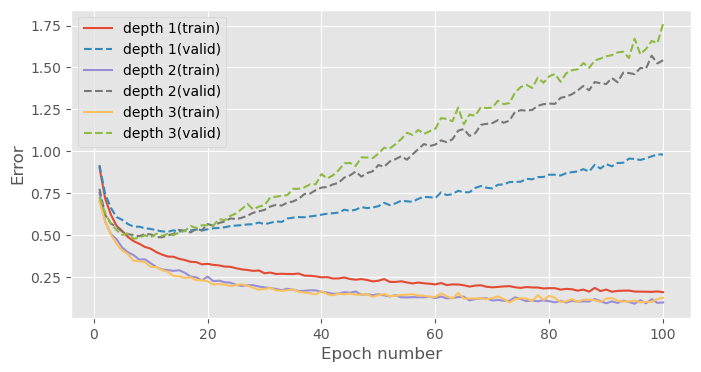

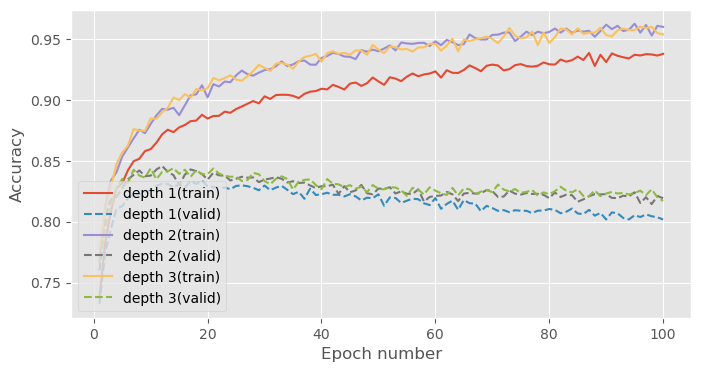

In [7]:
#task1 depth
%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


fig_error = plt.figure(figsize=(8, 4))
ax_error = fig_error.add_subplot(111)

fig_acc = plt.figure(figsize=(8, 4))
ax_acc = fig_acc.add_subplot(111)
d2m = [(1,MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])),(2,MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])),(3,MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ]))
    ]

for d, model in d2m:

    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time= train_model(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    ax_error.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['error(train)']], label=f'depth {d}(train)')
    ax_error.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['error(valid)']], linestyle='--', label=f'depth {d}(valid)')
        
    ax_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['acc(train)']], label=f'depth {d}(train)')
    ax_acc.plot(np.arange(1, stats.shape[0]) * stats_interval, 
        stats[1:, keys['acc(valid)']], linestyle='--', label=f'depth {d}(valid)')\

ax_error.legend(loc=0)
ax_error.set_xlabel('Epoch number')
ax_error.set_ylabel('Error')

ax_acc.legend(loc=0)
ax_acc.set_xlabel('Epoch number')
ax_acc.set_ylabel('Accuracy')

#fig_error.show()
#fig_acc.show()

plt.show()

In [14]:
###Drop Out#####
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
learning_rate = 1e-4
num_epochs = 100
stats_interval = 10
input_dim, output_dim, hidden_dim = 784, 47, 128

dprlist = [0.6,0.7,0.85,0.97]

rec=[]

for dpr in dprlist:
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate) 
    l1model= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        DropoutLayer(incl_prob=dpr, rng=np.random),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        DropoutLayer(incl_prob=dpr, rng=np.random),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
        ReluLayer(),
        DropoutLayer(incl_prob=dpr, rng=np.random),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])
    
    stats, keys, run_time= train_model(
        l1model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    rec.append(stats[-1])
print(rec)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10: 2.7s to complete
    error(train)=2.13e+00, acc(train)=6.66e-01, error(valid)=2.14e+00, acc(valid)=6.63e-01
Epoch 20: 3.2s to complete
    error(train)=1.72e+00, acc(train)=7.30e-01, error(valid)=1.75e+00, acc(valid)=7.24e-01
Epoch 30: 2.9s to complete
    error(train)=1.48e+00, acc(train)=7.59e-01, error(valid)=1.52e+00, acc(valid)=7.53e-01
Epoch 40: 2.7s to complete
    error(train)=1.39e+00, acc(train)=7.74e-01, error(valid)=1.47e+00, acc(valid)=7.64e-01
Epoch 50: 2.7s to complete
    error(train)=1.29e+00, acc(train)=7.85e-01, error(valid)=1.38e+00, acc(valid)=7.76e-01
Epoch 60: 2.6s to complete
    error(train)=1.20e+00, acc(train)=7.94e-01, error(valid)=1.31e+00, acc(valid)=7.84e-01
Epoch 70: 2.7s to complete
    error(train)=1.14e+00, acc(train)=8.00e-01, error(valid)=1.26e+00, acc(valid)=7.87e-01
Epoch 80: 2.8s to complete
    error(train)=1.09e+00, acc(train)=8.05e-01, error(valid)=1.22e+00, acc(valid)=7.91e-01
Epoch 90: 2.6s to complete
    error(train)=1.06e+00, ac

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10: 2.9s to complete
    error(train)=1.31e+00, acc(train)=7.13e-01, error(valid)=1.33e+00, acc(valid)=7.12e-01
Epoch 20: 2.8s to complete
    error(train)=1.04e+00, acc(train)=7.70e-01, error(valid)=1.08e+00, acc(valid)=7.62e-01
Epoch 30: 3.5s to complete
    error(train)=9.09e-01, acc(train)=7.95e-01, error(valid)=9.61e-01, acc(valid)=7.86e-01
Epoch 40: 3.2s to complete
    error(train)=8.41e-01, acc(train)=8.09e-01, error(valid)=9.08e-01, acc(valid)=7.98e-01
Epoch 50: 3.1s to complete
    error(train)=7.61e-01, acc(train)=8.19e-01, error(valid)=8.39e-01, acc(valid)=8.12e-01
Epoch 60: 2.7s to complete
    error(train)=7.39e-01, acc(train)=8.25e-01, error(valid)=8.35e-01, acc(valid)=8.14e-01
Epoch 70: 3.5s to complete
    error(train)=6.97e-01, acc(train)=8.30e-01, error(valid)=8.03e-01, acc(valid)=8.19e-01
Epoch 80: 3.9s to complete
    error(train)=6.63e-01, acc(train)=8.36e-01, error(valid)=7.81e-01, acc(valid)=8.23e-01
Epoch 90: 3.5s to complete
    error(train)=6.43e-01, ac

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10: 3.9s to complete
    error(train)=7.86e-01, acc(train)=7.71e-01, error(valid)=8.11e-01, acc(valid)=7.65e-01
Epoch 20: 4.0s to complete
    error(train)=6.03e-01, acc(train)=8.17e-01, error(valid)=6.45e-01, acc(valid)=8.09e-01
Epoch 30: 3.9s to complete
    error(train)=5.27e-01, acc(train)=8.36e-01, error(valid)=5.88e-01, acc(valid)=8.24e-01
Epoch 40: 3.9s to complete
    error(train)=4.77e-01, acc(train)=8.47e-01, error(valid)=5.57e-01, acc(valid)=8.33e-01
Epoch 50: 4.0s to complete
    error(train)=4.44e-01, acc(train)=8.57e-01, error(valid)=5.41e-01, acc(valid)=8.38e-01
Epoch 60: 3.8s to complete
    error(train)=4.15e-01, acc(train)=8.64e-01, error(valid)=5.27e-01, acc(valid)=8.43e-01
Epoch 70: 3.7s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.19e-01, acc(valid)=8.45e-01
Epoch 80: 3.7s to complete
    error(train)=3.73e-01, acc(train)=8.75e-01, error(valid)=5.12e-01, acc(valid)=8.46e-01
Epoch 90: 3.6s to complete
    error(train)=3.58e-01, ac

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10: 4.1s to complete
    error(train)=6.21e-01, acc(train)=8.06e-01, error(valid)=6.51e-01, acc(valid)=7.97e-01
Epoch 20: 4.1s to complete
    error(train)=4.76e-01, acc(train)=8.43e-01, error(valid)=5.32e-01, acc(valid)=8.28e-01
Epoch 30: 3.9s to complete
    error(train)=4.09e-01, acc(train)=8.62e-01, error(valid)=4.88e-01, acc(valid)=8.40e-01
Epoch 40: 3.2s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.66e-01, acc(valid)=8.48e-01
Epoch 50: 3.3s to complete
    error(train)=3.30e-01, acc(train)=8.84e-01, error(valid)=4.54e-01, acc(valid)=8.50e-01
Epoch 60: 3.1s to complete
    error(train)=3.01e-01, acc(train)=8.93e-01, error(valid)=4.44e-01, acc(valid)=8.52e-01
Epoch 70: 3.0s to complete
    error(train)=2.83e-01, acc(train)=8.99e-01, error(valid)=4.43e-01, acc(valid)=8.57e-01
Epoch 80: 3.1s to complete
    error(train)=2.62e-01, acc(train)=9.05e-01, error(valid)=4.40e-01, acc(valid)=8.57e-01
Epoch 90: 3.0s to complete
    error(train)=2.46e-01, ac

[array([1.0072872 , 0.81393   , 1.15946776, 0.79886076]), array([0.61855596, 0.84239   , 0.75764808, 0.82753165]), array([0.34610788, 0.88258   , 0.50759536, 0.85082278]), array([0.23415978, 0.91409   , 0.44805507, 0.85721519])]


In [8]:
#### L1 L2 ####

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty
learning_rate = 1e-4
num_epochs = 100
stats_interval = 5
input_dim, output_dim, hidden_dim = 784, 47, 128

coelist = [5e-4, 1e-3, 5e-3, 5e-2]

l1rec=[]
l2rec=[]

for coe in coelist:
    l1reg = L1Penalty(coe)
    l2reg = L2Penalty(coe)
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate) 
    l1model= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, l1reg, l1reg), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l1reg, l1reg), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l1reg, l1reg), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, l1reg, l1reg) # output layer
    ])
    
    stats, keys, run_time= train_model(
        l1model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    l1rec.append(stats[-1])
    
    error = CrossEntropySoftmaxError()
    # Use a Adam learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)
    l2model= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, l2reg, l2reg), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l2reg, l2reg), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, l2reg, l2reg), # hidden layer
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, l2reg, l2reg) # output layer
    ])
    stats, keys, run_time= train_model(
        l2model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    l2rec.append(stats[-1])
print(l1rec, l2rec)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 4.9s to complete
    error(train)=1.13e+00, acc(train)=6.85e-01, error(valid)=1.14e+00, acc(valid)=6.83e-01
Epoch 10: 4.1s to complete
    error(train)=9.71e-01, acc(train)=7.24e-01, error(valid)=9.75e-01, acc(valid)=7.22e-01
Epoch 15: 4.0s to complete
    error(train)=8.87e-01, acc(train)=7.45e-01, error(valid)=8.91e-01, acc(valid)=7.39e-01
Epoch 20: 4.0s to complete
    error(train)=8.39e-01, acc(train)=7.55e-01, error(valid)=8.44e-01, acc(valid)=7.51e-01
Epoch 25: 4.0s to complete
    error(train)=8.07e-01, acc(train)=7.63e-01, error(valid)=8.13e-01, acc(valid)=7.57e-01
Epoch 30: 3.9s to complete
    error(train)=7.77e-01, acc(train)=7.71e-01, error(valid)=7.84e-01, acc(valid)=7.69e-01
Epoch 35: 4.0s to complete
    error(train)=7.60e-01, acc(train)=7.75e-01, error(valid)=7.68e-01, acc(valid)=7.71e-01
Epoch 40: 4.0s to complete
    error(train)=7.48e-01, acc(train)=7.77e-01, error(valid)=7.57e-01, acc(valid)=7.74e-01
Epoch 45: 4.0s to complete
    error(train)=7.34e-01, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=8.44e-01, acc(train)=7.50e-01, error(valid)=8.59e-01, acc(valid)=7.46e-01
Epoch 10: 2.5s to complete
    error(train)=6.50e-01, acc(train)=8.01e-01, error(valid)=6.79e-01, acc(valid)=7.91e-01
Epoch 15: 2.5s to complete
    error(train)=5.65e-01, acc(train)=8.24e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01
Epoch 20: 2.4s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=5.65e-01, acc(valid)=8.21e-01
Epoch 25: 2.5s to complete
    error(train)=4.79e-01, acc(train)=8.46e-01, error(valid)=5.39e-01, acc(valid)=8.27e-01
Epoch 30: 2.5s to complete
    error(train)=4.50e-01, acc(train)=8.55e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01
Epoch 35: 2.6s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.11e-01, acc(valid)=8.36e-01
Epoch 40: 2.6s to complete
    error(train)=4.16e-01, acc(train)=8.63e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01
Epoch 45: 2.4s to complete
    error(train)=4.00e-01, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 4.0s to complete
    error(train)=1.40e+00, acc(train)=6.19e-01, error(valid)=1.40e+00, acc(valid)=6.14e-01
Epoch 10: 4.0s to complete
    error(train)=1.26e+00, acc(train)=6.50e-01, error(valid)=1.27e+00, acc(valid)=6.46e-01
Epoch 15: 4.0s to complete
    error(train)=1.16e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.71e-01
Epoch 20: 4.0s to complete
    error(train)=1.10e+00, acc(train)=6.88e-01, error(valid)=1.10e+00, acc(valid)=6.84e-01
Epoch 25: 4.1s to complete
    error(train)=1.05e+00, acc(train)=7.00e-01, error(valid)=1.05e+00, acc(valid)=6.98e-01
Epoch 30: 4.1s to complete
    error(train)=1.02e+00, acc(train)=7.08e-01, error(valid)=1.02e+00, acc(valid)=7.06e-01
Epoch 35: 4.1s to complete
    error(train)=9.93e-01, acc(train)=7.13e-01, error(valid)=9.94e-01, acc(valid)=7.12e-01
Epoch 40: 4.1s to complete
    error(train)=9.73e-01, acc(train)=7.18e-01, error(valid)=9.74e-01, acc(valid)=7.18e-01
Epoch 45: 4.1s to complete
    error(train)=9.55e-01, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=8.43e-01, acc(train)=7.52e-01, error(valid)=8.61e-01, acc(valid)=7.48e-01
Epoch 10: 2.5s to complete
    error(train)=6.77e-01, acc(train)=7.96e-01, error(valid)=7.01e-01, acc(valid)=7.90e-01
Epoch 15: 2.5s to complete
    error(train)=5.90e-01, acc(train)=8.18e-01, error(valid)=6.25e-01, acc(valid)=8.09e-01
Epoch 20: 2.5s to complete
    error(train)=5.41e-01, acc(train)=8.31e-01, error(valid)=5.83e-01, acc(valid)=8.18e-01
Epoch 25: 2.4s to complete
    error(train)=5.09e-01, acc(train)=8.39e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01
Epoch 30: 2.5s to complete
    error(train)=4.82e-01, acc(train)=8.47e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01
Epoch 35: 2.5s to complete
    error(train)=4.57e-01, acc(train)=8.53e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01
Epoch 40: 2.5s to complete
    error(train)=4.47e-01, acc(train)=8.55e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01
Epoch 45: 2.5s to complete
    error(train)=4.30e-01, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02
Epoch 10: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.08e-02
Epoch 15: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.02e-02
Epoch 20: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02
Epoch 25: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.11e-02, error(valid)=3.85e+00, acc(valid)=2.13e-02
Epoch 30: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.16e-02
Epoch 35: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02
Epoch 40: 4.1s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.04e-02
Epoch 45: 4.2s to complete
    error(train)=3.85e+00, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=9.66e-01, acc(train)=7.26e-01, error(valid)=9.73e-01, acc(valid)=7.22e-01
Epoch 10: 2.5s to complete
    error(train)=8.15e-01, acc(train)=7.66e-01, error(valid)=8.25e-01, acc(valid)=7.64e-01
Epoch 15: 2.5s to complete
    error(train)=7.49e-01, acc(train)=7.80e-01, error(valid)=7.61e-01, acc(valid)=7.74e-01
Epoch 20: 2.7s to complete
    error(train)=7.13e-01, acc(train)=7.90e-01, error(valid)=7.26e-01, acc(valid)=7.86e-01
Epoch 25: 2.5s to complete
    error(train)=6.83e-01, acc(train)=7.97e-01, error(valid)=6.96e-01, acc(valid)=7.89e-01
Epoch 30: 2.5s to complete
    error(train)=6.63e-01, acc(train)=8.04e-01, error(valid)=6.78e-01, acc(valid)=7.98e-01
Epoch 35: 2.4s to complete
    error(train)=6.45e-01, acc(train)=8.09e-01, error(valid)=6.60e-01, acc(valid)=8.04e-01
Epoch 40: 2.4s to complete
    error(train)=6.36e-01, acc(train)=8.10e-01, error(valid)=6.52e-01, acc(valid)=8.03e-01
Epoch 45: 2.4s to complete
    error(train)=6.26e-01, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.21e-02
Epoch 10: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.15e-02
Epoch 15: 4.2s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02
Epoch 20: 4.4s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.20e-02
Epoch 25: 5.3s to complete
    error(train)=3.85e+00, acc(train)=2.12e-02, error(valid)=3.85e+00, acc(valid)=2.19e-02
Epoch 30: 4.6s to complete
    error(train)=3.85e+00, acc(train)=2.15e-02, error(valid)=3.85e+00, acc(valid)=2.07e-02
Epoch 35: 4.5s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02
Epoch 40: 4.3s to complete
    error(train)=3.85e+00, acc(train)=2.13e-02, error(valid)=3.85e+00, acc(valid)=2.28e-02
Epoch 45: 4.4s to complete
    error(train)=3.85e+00, acc

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 5: 2.4s to complete
    error(train)=2.18e+00, acc(train)=4.26e-01, error(valid)=2.18e+00, acc(valid)=4.22e-01
Epoch 10: 2.4s to complete
    error(train)=2.15e+00, acc(train)=4.31e-01, error(valid)=2.15e+00, acc(valid)=4.27e-01
Epoch 15: 2.4s to complete
    error(train)=2.15e+00, acc(train)=4.39e-01, error(valid)=2.15e+00, acc(valid)=4.35e-01
Epoch 20: 2.5s to complete
    error(train)=2.13e+00, acc(train)=4.42e-01, error(valid)=2.13e+00, acc(valid)=4.37e-01
Epoch 25: 2.5s to complete
    error(train)=2.13e+00, acc(train)=4.42e-01, error(valid)=2.13e+00, acc(valid)=4.36e-01
Epoch 30: 2.4s to complete
    error(train)=2.13e+00, acc(train)=4.43e-01, error(valid)=2.13e+00, acc(valid)=4.39e-01
Epoch 35: 2.4s to complete
    error(train)=2.13e+00, acc(train)=4.45e-01, error(valid)=2.13e+00, acc(valid)=4.36e-01
Epoch 40: 2.5s to complete
    error(train)=2.12e+00, acc(train)=4.46e-01, error(valid)=2.12e+00, acc(valid)=4.40e-01
Epoch 45: 2.4s to complete
    error(train)=2.12e+00, acc

[array([0.65665799, 0.80154   , 0.6728384 , 0.79651899]), array([0.85957707, 0.74632   , 0.86740183, 0.74367089]), array([3.85014753, 0.02175   , 3.85014767, 0.01981013]), array([3.85014763, 0.02144   , 3.8501474 , 0.02227848])] [array([0.31172785, 0.89412   , 0.45532267, 0.84867089]), array([0.36226978, 0.87908   , 0.4599295 , 0.84664557]), array([0.58317975, 0.82534   , 0.60651914, 0.81689873]), array([2.10666068, 0.4488    , 2.1077465 , 0.44025316])]


In [11]:
for e, r in zip(coelist, l1rec):
    print(e,r[3],r[0],r[2])
for e, r in zip(coelist, l2rec):
    print(e,r[3],r[0],r[2])

#err train, acc train, err val, acc val

0.0005 0.796518987341772 0.6566579853470331 0.6728384001071651
0.001 0.7436708860759493 0.8595770740627792 0.8674018325616423
0.005 0.019810126582278445 3.850147527018282 3.8501476742201275
0.05 0.02227848101265819 3.850147627803748 3.8501474019511006
0.0005 0.8486708860759495 0.31172785183255836 0.4553226679197118
0.001 0.8466455696202528 0.3622697793174211 0.45992950202026345
0.005 0.8168987341772146 0.5831797480434044 0.6065191389867088
0.05 0.44025316455696206 2.1066606829898107 2.1077464965056127


In [6]:
## smoothing
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

smooth_train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng, smooth_labels=True)
smooth_valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng, smooth_labels=True)

learning_rate = 1e-4
num_epochs = 100
stats_interval = 10
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)
 
model= MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

stats, keys, run_time= train_model(
        model, error, learning_rule, smooth_train_data, smooth_valid_data, num_epochs, stats_interval, notebook=True)
print(stats[-1])




KeysView(NpzFile '..\\data\\emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '..\\data\\emnist-valid.npz' with keys: inputs, targets)


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10: 2.4s to complete
    error(train)=1.34e+00, acc(train)=8.10e-01, error(valid)=1.37e+00, acc(valid)=7.99e-01
Epoch 20: 2.8s to complete
    error(train)=1.22e+00, acc(train)=8.45e-01, error(valid)=1.26e+00, acc(valid)=8.29e-01
Epoch 30: 3.3s to complete
    error(train)=1.16e+00, acc(train)=8.62e-01, error(valid)=1.22e+00, acc(valid)=8.38e-01
Epoch 40: 2.9s to complete
    error(train)=1.12e+00, acc(train)=8.73e-01, error(valid)=1.20e+00, acc(valid)=8.43e-01
Epoch 50: 2.7s to complete
    error(train)=1.09e+00, acc(train)=8.82e-01, error(valid)=1.18e+00, acc(valid)=8.49e-01
Epoch 60: 2.6s to complete
    error(train)=1.07e+00, acc(train)=8.90e-01, error(valid)=1.17e+00, acc(valid)=8.50e-01
Epoch 70: 2.6s to complete
    error(train)=1.06e+00, acc(train)=8.96e-01, error(valid)=1.17e+00, acc(valid)=8.51e-01
Epoch 80: 2.5s to complete
    error(train)=1.04e+00, acc(train)=8.99e-01, error(valid)=1.17e+00, acc(valid)=8.49e-01
Epoch 90: 2.9s to complete
    error(train)=1.03e+00, ac

[1.02280587 0.90785    1.16114342 0.85196203]


In [ ]:
def test_best(
        model, error, learning_rule, train_data, valid_data,test_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    print(optimiser.eval_monitors(test_data, 'test'))

    return None

In [3]:
#Q6 test

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
learning_rate = 1e-4
num_epochs = 100
stats_interval = 10
input_dim, output_dim, hidden_dim = 784, 47, 128
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

test_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng, smooth_labels=False)



error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate) 
l1model= MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    DropoutLayer(incl_prob=0.85, rng=np.random),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    DropoutLayer(incl_prob=0.85, rng=np.random),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    DropoutLayer(incl_prob=0.85, rng=np.random),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

test_best(
    l1model, error, learning_rule, train_data, valid_data,test_data, num_epochs, stats_interval, notebook=True)




KeysView(NpzFile '..\\data\\emnist-valid.npz' with keys: inputs, targets)


NameError: name 'weights_init' is not defined